# HR Analytics CASE STUDY  Project3


# Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in
training those employees, not just this but there are training programs within the companies for their
existing employees as well.The aim of these programs is to increase the effectiveness of their employees.
But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics Human resource analytics (HR analytics) is an area in the field of analytics that refers to 
applying analytic processes to the human resource department of an organization in the hope of improving 
employee performance and therefore getting a better return on investment. HR analytics does not just deal
with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering
data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition 
is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs,
work culture, and motivation systems that help the organization retain top employees.How does Attrition affect companies?
and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, 
we will write the code and try to understand the process step by step.


Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, 
and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular
employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. 
This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar 
people. Errors and issues are more likely if you constantly have new workers.


Target Varibale:Attrition which is a categorical column having binary values so this is the case of Classification Analysis.We need to predict the attrition rate.

In [1]:
#importing all the necessary libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [3]:
import pandas as pd
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")  
df.head()  #Checking out the top 5 rows of the dataset

Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes      Travel_Rarely       1102                   Sales                 1          2  Life Sciences              1               1                        2  Female          94               3         2        Sales Executive                4        Single           5993        19479                   8      Y      Yes                 11                  3                         1             80                 0                  8                      0                1               6                   4                        0                     5
1   49        No  Travel_Frequently        279  Research & Development                 8          1  Life Sciences              1               2                        3    Male          61               2         2     Research Scientist                2       Married           5130        24907                   1      Y       No                 23                  4                         4             80                 1                 10                      3                3              10                   7                        1                     7
2   37       Yes      Travel_Rarely       1373  Research & Development                 2          2          Other              1               4                        4    Male          92               2         1  Laboratory Technician                3        Single           2090         2396                   6      Y      Yes                 15                  3                         2             80                 0                  7                      3                3               0                   0                        0                     0
3   33        No  Travel_Frequently       1392  Research & Development                 3          4  Life Sciences              1               5                        4  Female          56               3         1     Research Scientist                3       Married           2909        23159                   1      Y      Yes                 11                  3                         3             80                 0                  8                      3                3               8                   7                        3                     0
4   27        No      Travel_Rarely        591  Research & Development                 2          1        Medical              1               7                        1    Male          40               3         1  Laboratory Technician                2       Married           3468        16632                   9      Y       No                 12                  3                         4             80                 1                  6                      3                3               2                   2                        2                     2

In [4]:
df.shape    #Checking the dimensions of the dataset

(1470, 35)

There are 1470 rows and 35 columns 

In [5]:
df.columns   #Checking out the columns of the dataset

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype='object')

In [6]:
df.dtypes #checking datatypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Thus we see that there are 9 categorical columns and 26 columns are numeric.
The categorical columns needs to be converted to numeric before modeling

In [7]:
# description of the categorcal features
df.describe(include=np.object)

Attrition BusinessTravel              Department EducationField Gender          JobRole MaritalStatus Over18 OverTime
count       1470           1470                    1470           1470   1470             1470          1470   1470     1470
unique         2              3                       3              6      2                9             3      1        2
top           No  Travel_Rarely  Research & Development  Life Sciences   Male  Sales Executive       Married      Y       No
freq        1233           1043                     961            606    882              326           673   1470     1054

Observation:
1.There is no missing value which can be seen from the count section of all columns.

2.Attrition and Overtime has binary value.

3.Gender has two unique values-male and female.

4.Business travel,departmnet and marital status has 3 unique values.

5.There are 6 education field in the company.

6.There are 9 jobrole in the company.

7.All are working  above the age of 18yrs.

In [8]:
# description of  numerical feautres description:
df.describe().T

count          mean          std     min      25%      50%       75%      max
Age                       1470.0     36.923810     9.135373    18.0    30.00     36.0     43.00     60.0
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00    802.0   1157.00   1499.0
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00      7.0     14.00     29.0
Education                 1470.0      2.912925     1.024165     1.0     2.00      3.0      4.00      5.0
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00      1.0      1.00      1.0
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   1020.5   1555.75   2068.0
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00      3.0      4.00      4.0
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00     66.0     83.75    100.0
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00      3.0      3.00      4.0
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00      2.0      3.00      5.0
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00      3.0      4.00      4.0
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   4919.0   8379.00  19999.0
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00  14235.5  20461.50  26999.0
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00      2.0      4.00      9.0
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00     14.0     18.00     25.0
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00      3.0      3.00      4.0
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00      3.0      4.00      4.0
StandardHours             1470.0     80.000000     0.000000    80.0    80.00     80.0     80.00     80.0
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00      1.0      1.00      3.0
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00     10.0     15.00     40.0
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00      3.0      3.00      6.0
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00      3.0      3.00      4.0
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00      5.0      9.00     40.0
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00      3.0      7.00     18.0
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00      1.0      3.00     15.0
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00      3.0      7.00     17.0

Observation:
1.No missing value which can be seen from the count .

2.Mostly employee working in the company are of the age 36 yrs,minimum age in 18yrs.

3.The min. daily rate is 102 and max daily rate is 1499.

4.The maximum distance employee covered from home to company location is 29km and minimum is 1km.

5.Education is shown in mumerical value.

6.Employeenumber is a employeeid

7.The max. hourly rate is 100 and min. is 30.

8.The max.monthlyincome is 19999 and min. is 1009.

9.There is a fixed standard working hours.

10.Years since last promotion is just 2 times,which may be cause of attrition.

11.High standard deviation in daily rate,employee number,omnthly income,monthly rate.

12.There is a quite high difference in mean and median value which means that dataset is having skewness in daily rate,employee number,hourly rate,mnthly income,monthly rate.

13.The difference between 75th percentile and maximum value is large for most columns and from this we can
  assume that there are outliers present.    

In [9]:
df.isnull().sum()   #Checking for null values in the dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no missing value in the dataset ,so no need to apply imutation technique

<AxesSubplot:>

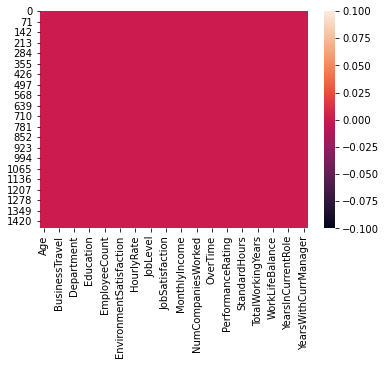

In [10]:
sns.heatmap(df.isnull()) 

The visual representation shows there is no missing value.

# Univariate Analysis

Univariate Analysis for categorical columns

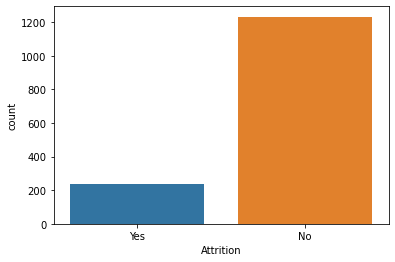

No     1233
Yes     237
Name: Attrition, dtype: int64


In [11]:
sns.countplot(x='Attrition', data=df)  #Plotting the attrition rate  using countplot
plt.show()
print(df['Attrition'].value_counts())

Thus we see that there are 237 employee have left the company i.e approx 16% and 1233 employee are working in the company that is around 84% and dataset are significantly imbalances which we will be balancing using smote later. 

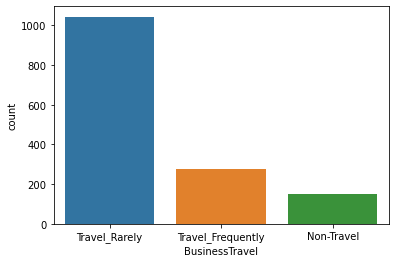

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


In [12]:
sns.countplot(x='BusinessTravel', data=df)  #BusinessTravel using countplot
plt.show()
print(df['BusinessTravel'].value_counts())

Thus we observe that there are 1043 employee who travel rarely,277 employees who travel frequently and 150 people
who dont opt for business trips

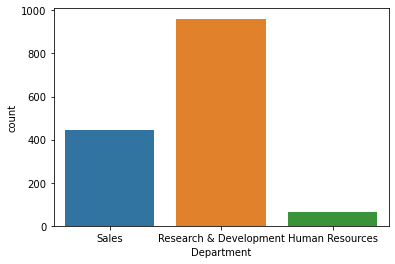

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


In [13]:
sns.countplot(x='Department', data=df)  #Department using countplot
plt.show()
print(df['Department'].value_counts())

There are 961 employess in research and development,446 employess in sales and 63 in Human resources which is least.

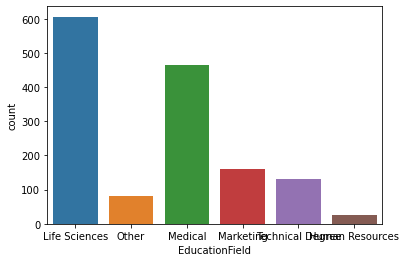

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


In [14]:
sns.countplot(x='EducationField', data=df)  #Education Field using countplot
plt.show()
print(df['EducationField'].value_counts())

Thus we see that 606 employes have educational backgroung of life sciences,464employess have have educational background of  medical,159 emplopyee have the techical degree ,82 employee studied other,and least having  human resources background.

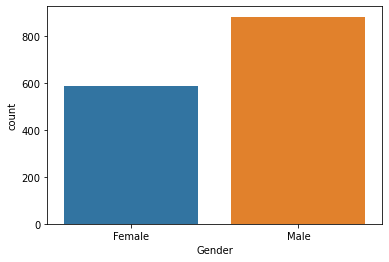

Male      882
Female    588
Name: Gender, dtype: int64


In [15]:
sns.countplot(x='Gender', data=df)  #Gender using countplot
plt.show()
print(df['Gender'].value_counts())

The number of male employee is more than the female employee

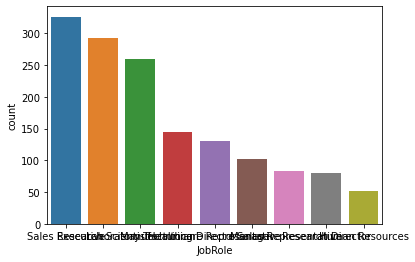

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


In [16]:
sns.countplot(x='JobRole', data=df)  #JobRole using countplot
plt.show()
print(df['JobRole'].value_counts())

<AxesSubplot:title={'center':'JobRole'}, ylabel='EmployeeCount'>

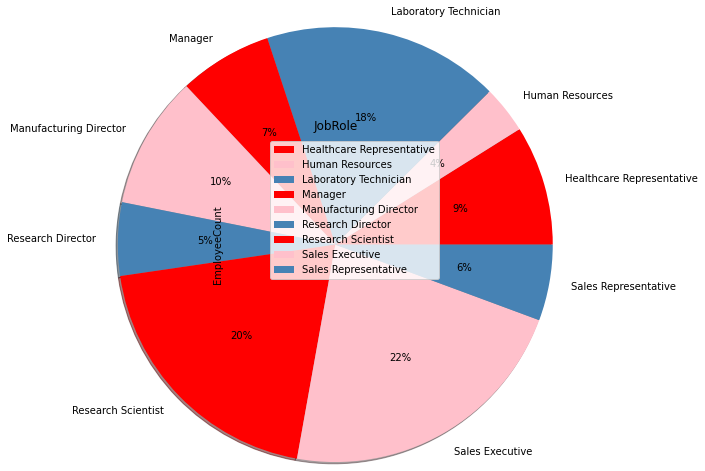

In [17]:
df.groupby(['JobRole']).sum().plot(kind='pie', y='EmployeeCount', autopct='%1.0f%%',
                                colors = ['red', 'pink', 'steelblue'],radius=2.5,shadow=True,
                                title='JobRole')

In [18]:
#Pie-plot represnetation of jobrole using employee count.

We see that majority of the employees i.e 22% belong to the sales executive designation as they are the face of the company,
dealing clients upfront and handling their queries,complaints etc and least is Human resources i.e 4%  due to the lower
presence.

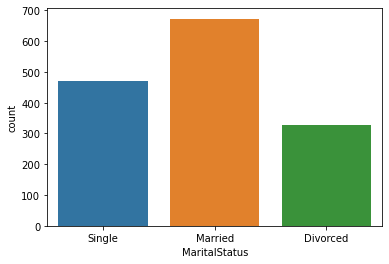

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


In [19]:
sns.countplot(x='MaritalStatus', data=df)  #MaritalStatus using countplot
plt.show()
print(df['MaritalStatus'].value_counts())

Married employees are more in number i.e 673 compare to others,divorced being the least working in the company.

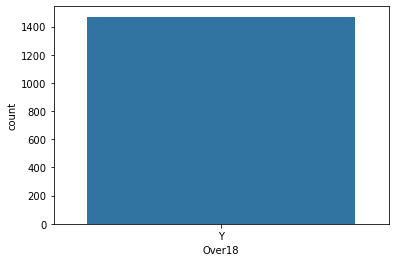

Y    1470
Name: Over18, dtype: int64


In [20]:
sns.countplot(x='Over18', data=df)  #Over18 using countplot
plt.show()
print(df['Over18'].value_counts())

All are above 18 years of age,as per the child labor law ,everyone shuold be above 18 for working.

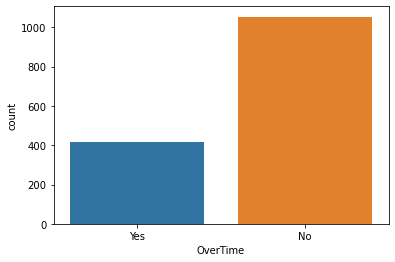

No     1054
Yes     416
Name: OverTime, dtype: int64


In [21]:
sns.countplot(x='OverTime', data=df)  #OverTime using countplot
plt.show()
print(df['OverTime'].value_counts())

There are 416 employees who are doing overtime (working late) and rest 1054 employee dont do overtime.

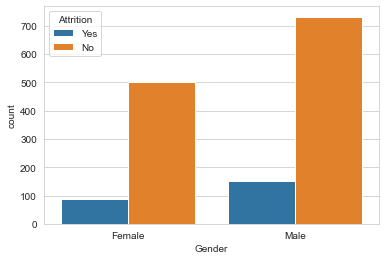

In [22]:
#checking the attrition based on gender
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=df,hue='Attrition')
plt.show()

Attrition in working male employee is high compare to female employee

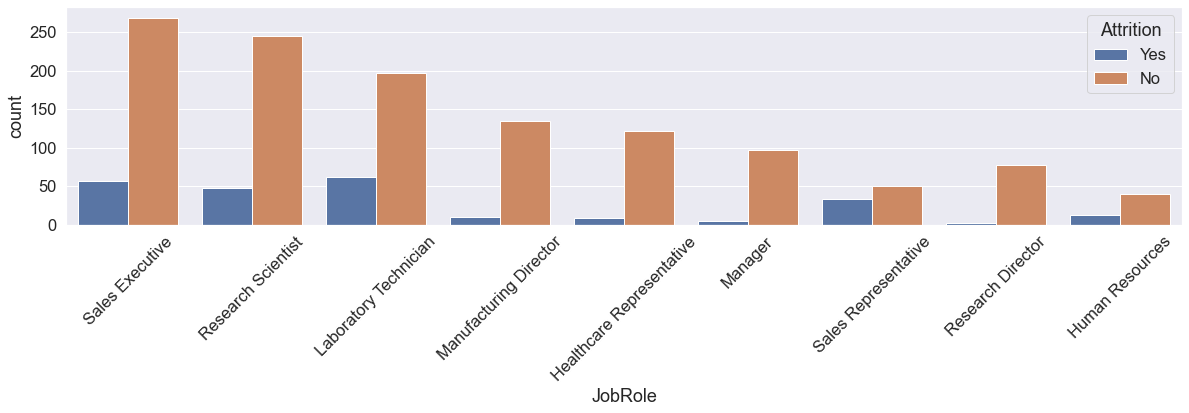

In [23]:
#checking the attrition according to jobrole
plt.figure(figsize=(20,4))
sns.set(font_scale=1.5)
sns.countplot(x='JobRole',data=df,hue='Attrition')
plt.xticks(rotation=45)
plt.show()

Thus we see attrition rate is more in sales executive and laboratory technician and least in human resource role. 

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


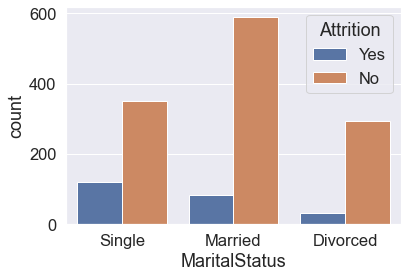

In [24]:
#checking the attrition according to MaritalStatus
print(df['MaritalStatus'].value_counts())
sns.countplot(x='MaritalStatus',data=df,hue='Attrition')
plt.show()

Single and married emplyee working have more attrition rate and least is divorced .

# Univariate analysis for numerical column (non_object cloumn)

Making dataframe for ordinal column

In [25]:
non_obj=['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction',
         'HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
         'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel',
         'TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
         'YearsSinceLastPromotion','YearsWithCurrManager']
non_obj


['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [26]:
def univariateAnalysis_numeric(non_obj,nbins):
    plt.figure(figsize=(5,5))
    print("----------------------------------------------------------------------------")
    sns.displot(df[non_obj], kde=True)#, color='blue')
    plt.title("Distribution of " + non_obj)
    plt.show()
    
    plt.figure(figsize=(5,5))
    print("----------------------------------------------------------------------------")
    ax = df.boxplot(non_obj,patch_artist=True)
    plt.title("BoxPlot of " + non_obj)
    plt.ylabel('Values')
    plt.show()

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

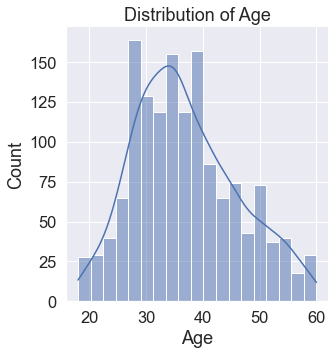

----------------------------------------------------------------------------


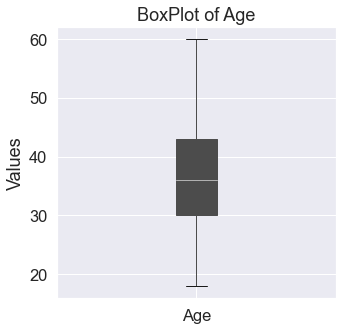

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

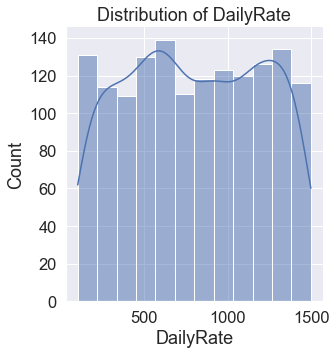

----------------------------------------------------------------------------


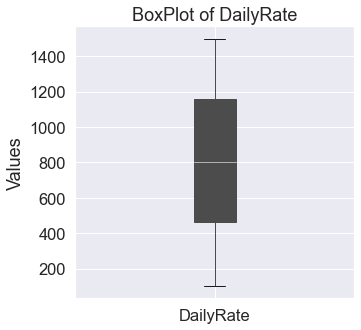

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

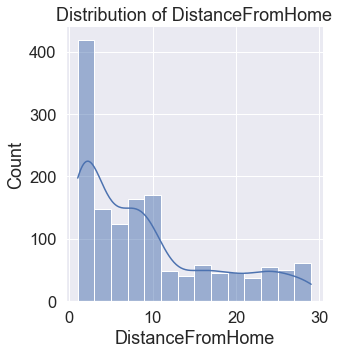

----------------------------------------------------------------------------


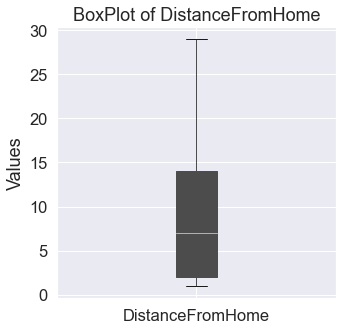

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

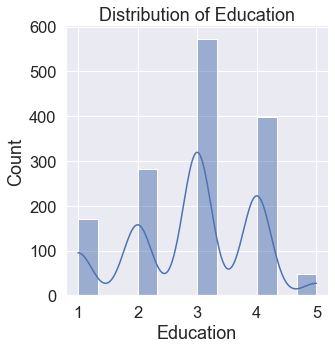

----------------------------------------------------------------------------


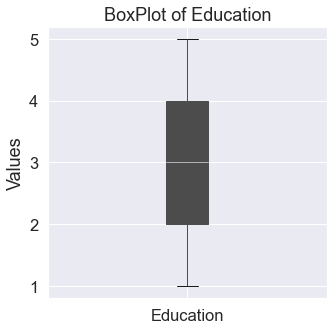

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

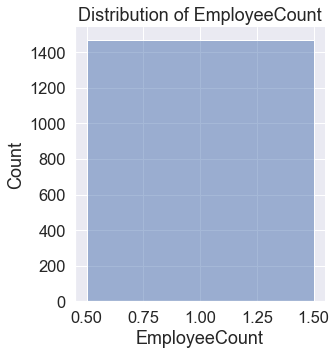

----------------------------------------------------------------------------


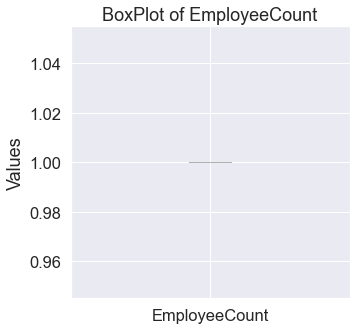

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

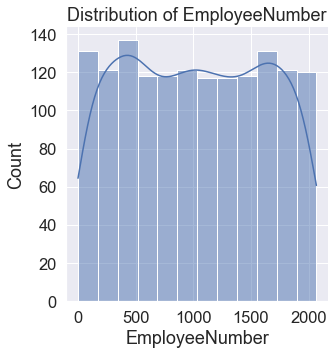

----------------------------------------------------------------------------


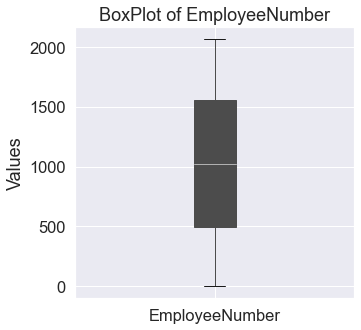

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

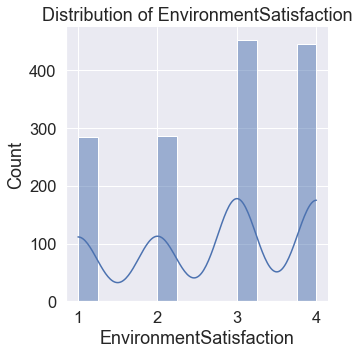

----------------------------------------------------------------------------


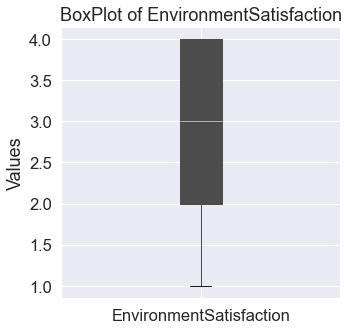

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

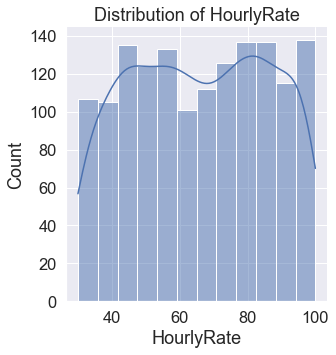

----------------------------------------------------------------------------


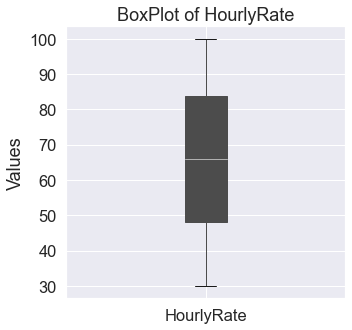

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

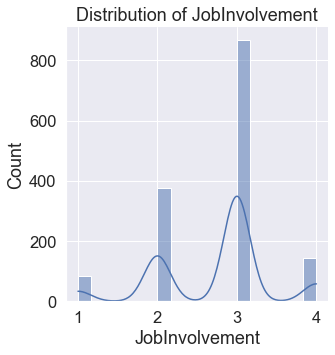

----------------------------------------------------------------------------


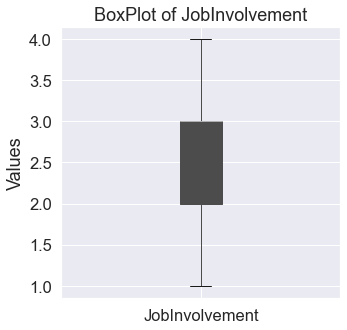

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

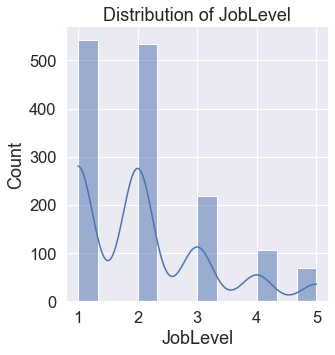

----------------------------------------------------------------------------


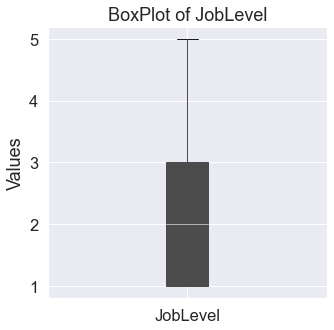

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

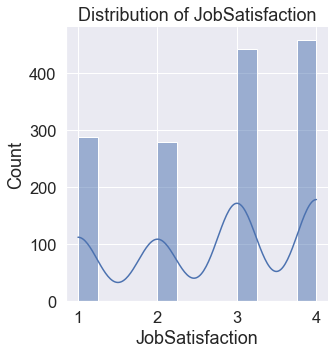

----------------------------------------------------------------------------


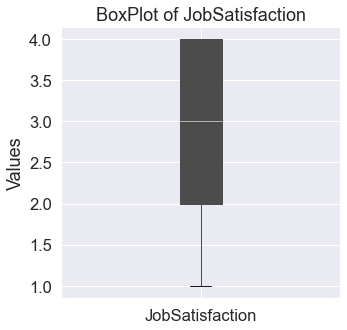

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

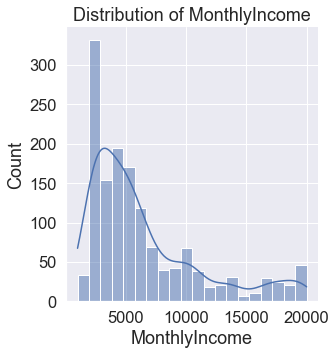

----------------------------------------------------------------------------


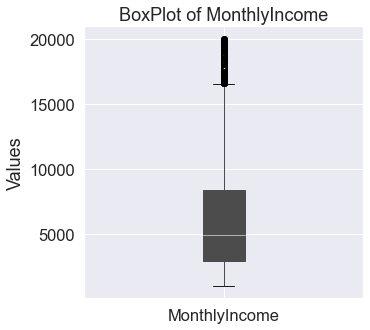

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

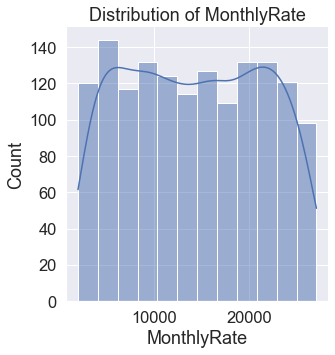

----------------------------------------------------------------------------


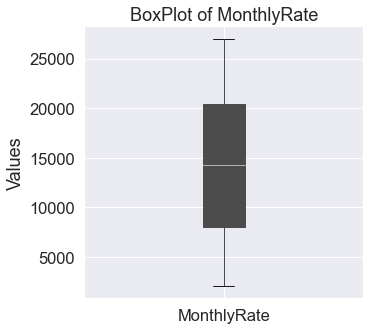

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

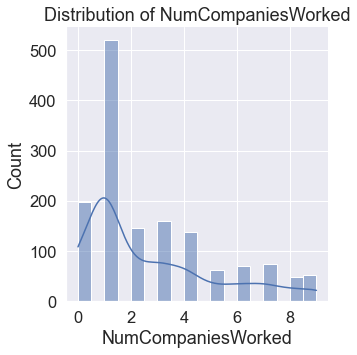

----------------------------------------------------------------------------


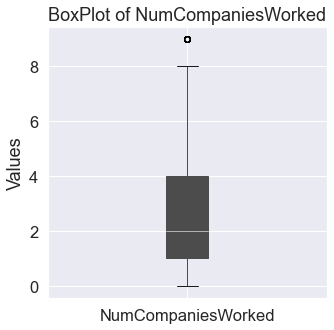

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

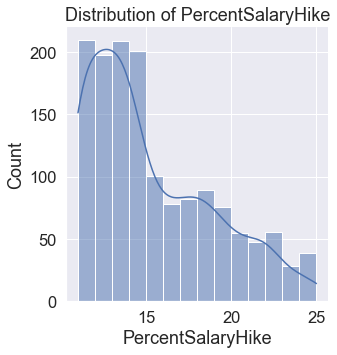

----------------------------------------------------------------------------


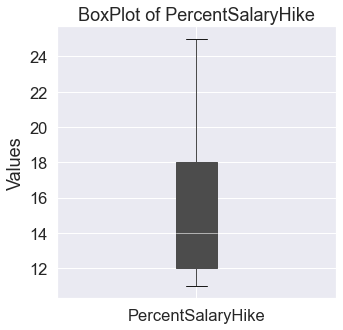

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

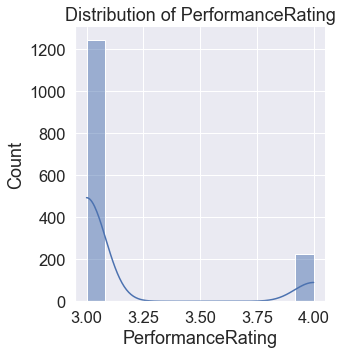

----------------------------------------------------------------------------


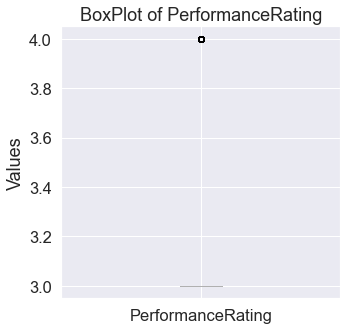

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

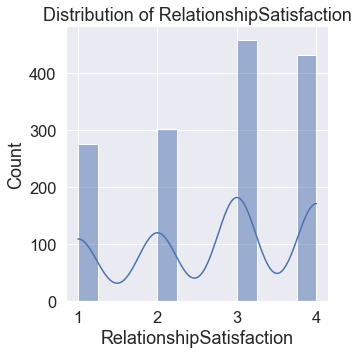

----------------------------------------------------------------------------


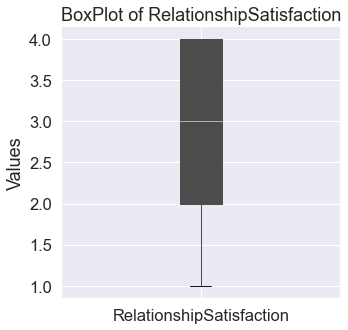

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

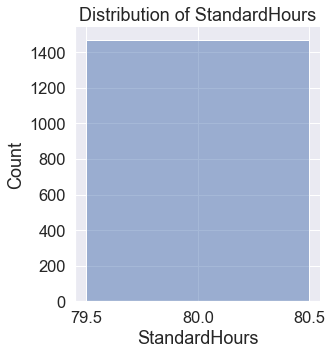

----------------------------------------------------------------------------


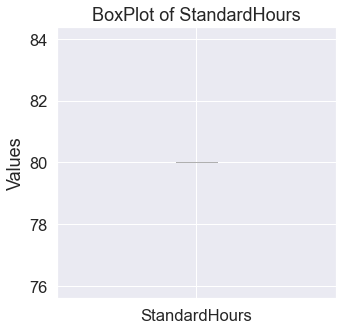

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

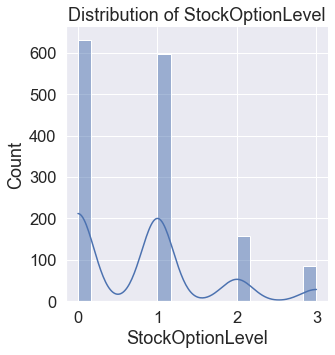

----------------------------------------------------------------------------


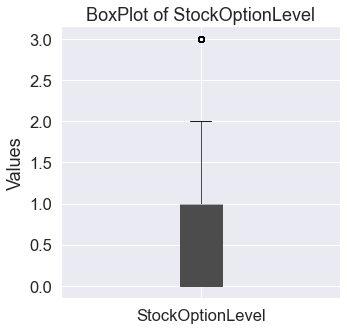

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

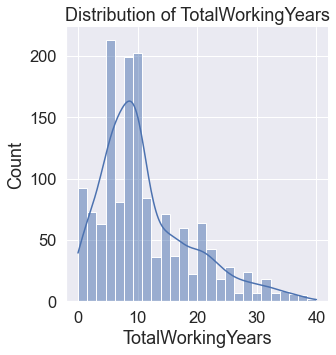

----------------------------------------------------------------------------


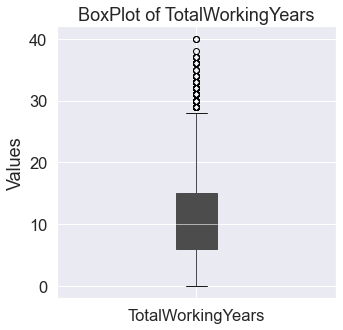

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

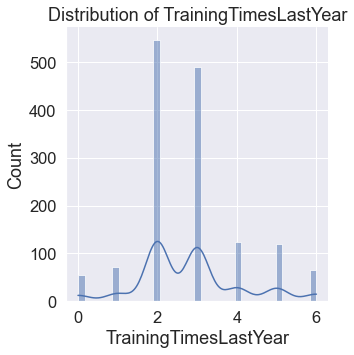

----------------------------------------------------------------------------


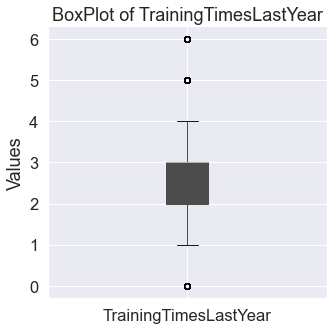

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

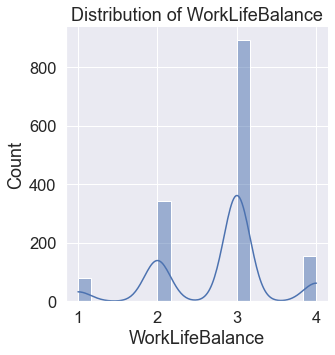

----------------------------------------------------------------------------


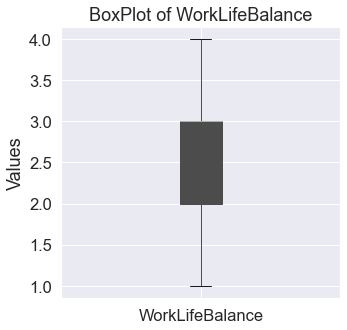

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

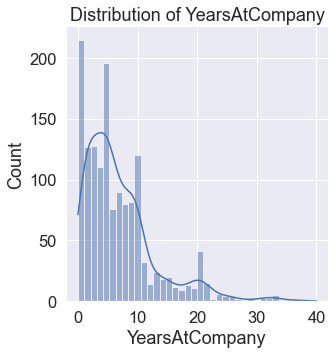

----------------------------------------------------------------------------


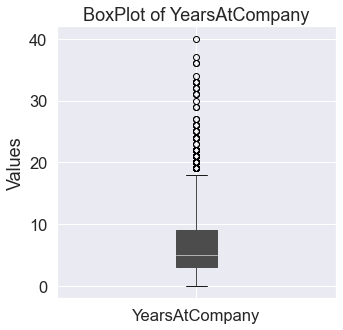

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

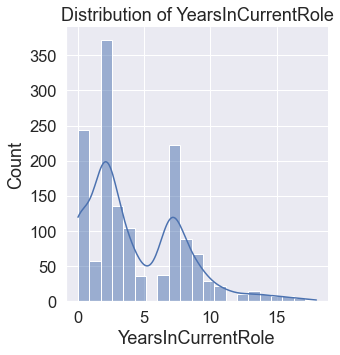

----------------------------------------------------------------------------


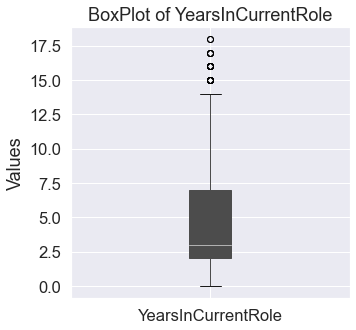

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

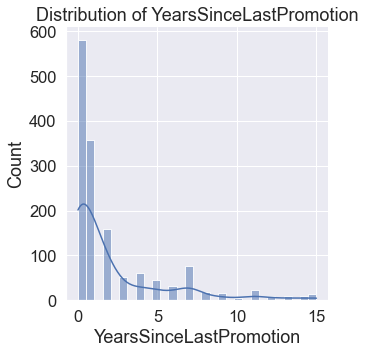

----------------------------------------------------------------------------


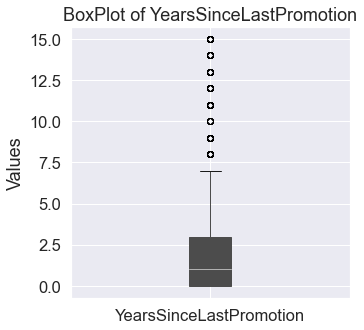

----------------------------------------------------------------------------


<Figure size 360x360 with 0 Axes>

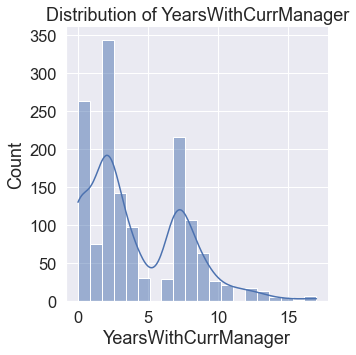

----------------------------------------------------------------------------


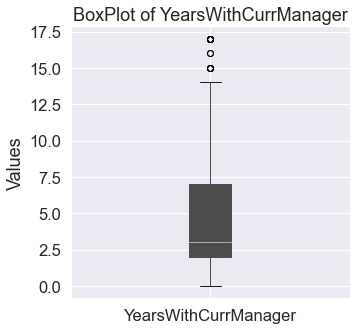

In [27]:
for x in non_obj:
    univariateAnalysis_numeric(x, 100);

Thus from above non_object analysis,
from displot :we find that most of the datas are not normally distributed and has skewness.
from boxplot, columnslikemonthlyincome,numcompaniesworked,performancerating,stockoptionlevel,totalworkingyears,
trainingtimeslastyear,yearsatcompany,yaersincurrentrole,yearssincelastpromotion,yearswithcurrmanager 
has outliers,which we will be removinh later on.


<AxesSubplot:title={'center':'Joblevel'}, ylabel='EmployeeCount'>

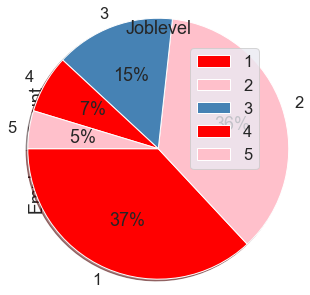

In [28]:
df.groupby(['JobLevel']).sum().plot(kind='pie', y='EmployeeCount', autopct='%2.0f%%',
                                colors = ['red', 'pink', 'steelblue'],radius=1.5,shadow=True,startangle=180,title='Joblevel')

Thus, using pie-plot,we find that majority of the employee belong to level 1 (37%)and level2(36%) and 
least employees belong to level 4.As employement start from the entry level for freshers and for experience person,
it depends on their skills and then he goes to level 2 after promotion and this goes on.So very few people depending
upon their eligibility and skills ,they go to the top level after working for longer period in the company.

# Bivariate Analysis

 Checking the features wrt to attrition:

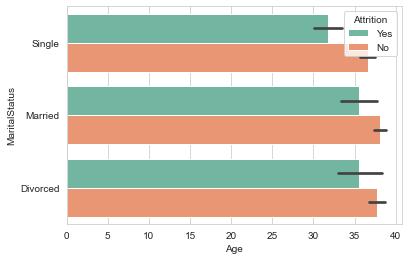

In [28]:
sns.barplot(x='Age',y='MaritalStatus',hue='Attrition',data=df,palette="Set2") 
sns.set_style('whitegrid')

We can see that for both married and divorced status employees, based on their age , the Attrition rate is high.

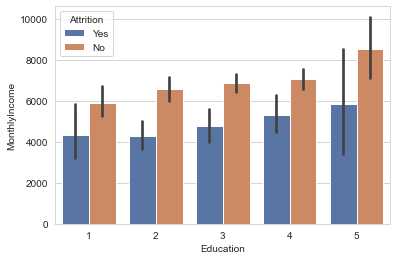

In [38]:
#Education vs monthly income
sns.barplot(x='Education',y='MonthlyIncome',hue='Attrition',data=df,palette="deep") 
sns.set_style('whitegrid')

The higher the eductaion,the more is the salary the employee getting.
The employees who are highly educationally qualified and not getting enough pay will tend to leave the company.So we need to look after these employeesas they are the asset of the company.

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='NumCompaniesWorked'>

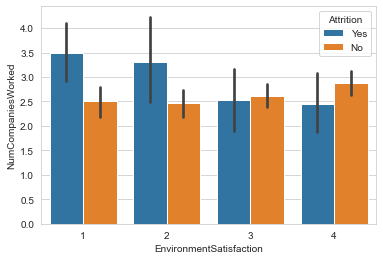

In [40]:
#Environment statisfaction vs numcomapnies worked on the basis of attrition
sns.barplot(x='EnvironmentSatisfaction',y='NumCompaniesWorked',hue='Attrition',data=df)

We can observe that employee working in the company having environment satisfaction less,chances of atrrition is more.
Thus working environment should be good in order to retain the employees else they will keep on changing companies.
Most employees have changes the more number of comapny as there is less enviroment satisfaction.

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='Gender'>

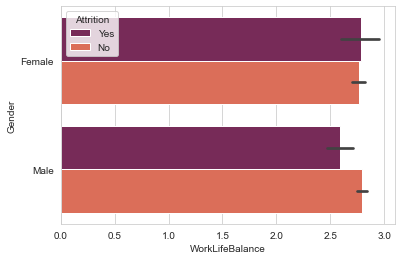

In [31]:
#working live balance with gender on the basis of attrition
sns.barplot(x='WorkLifeBalance',y='Gender',hue='Attrition',data=df,palette="rocket")

 Thus we see female employee are having more attrition than male on the basis of work life balance
.Women's greatest struggle is balancing the responsibilities of family and employment.It is very
necessary for the comapnies to acknowledge women employees by providing more appropriate work-life balance
measures for them.   

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

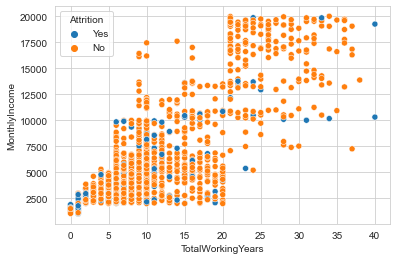

In [32]:
# total working years to montly income on the basis of attrition
sns.scatterplot(df.TotalWorkingYears,df.MonthlyIncome,hue=df.Attrition)

Employees with less number of working years and having less monthly income tend to leave the company frequetly .
Thus we conclude that we need to devise productive monthly income  in order to retain the employees or
else they will leave the company sooner.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Age'>

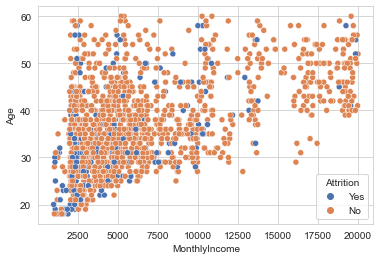

In [41]:
sns.scatterplot(data=df, x="MonthlyIncome", y="Age", hue="Attrition",palette="deep")

We can see employee between the age group of 20-40 are leaving the company having monthly income less than 7500 but majarity are staying in the company

In [51]:
#Checking correlation of the continuous dataset
corr=df.corr()  #corr() function provides the correlation value of each column
corr

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
Age                       1.000000   0.010661         -0.001686   0.208034            NaN       -0.010145                 0.010146    0.024287        0.029820  0.509604        -0.004892       0.497855     0.028051            0.299635           0.003634           0.001904                  0.053535            NaN          0.037510           0.680381              -0.019621        -0.021490        0.311309            0.212901                 0.216513              0.202089
DailyRate                 0.010661   1.000000         -0.004985  -0.016806            NaN       -0.050990                 0.018355    0.023381        0.046135  0.002966         0.030571       0.007707    -0.032182            0.038153           0.022704           0.000473                  0.007846            NaN          0.042143           0.014515               0.002453        -0.037848       -0.034055            0.009932                -0.033229             -0.026363
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042            NaN        0.032916                -0.016075    0.031131        0.008783  0.005303        -0.003669      -0.017014     0.027473           -0.029251           0.040235           0.027110                  0.006557            NaN          0.044872           0.004628              -0.036942        -0.026556        0.009508            0.018845                 0.010029              0.014406
Education                 0.208034  -0.016806          0.021042   1.000000            NaN        0.042070                -0.027128    0.016775        0.042438  0.101589        -0.011296       0.094961    -0.026084            0.126317          -0.011111          -0.024539                 -0.009118            NaN          0.018422           0.148280              -0.025100         0.009819        0.069114            0.060236                 0.054254              0.069065
EmployeeCount                  NaN        NaN               NaN        NaN            NaN             NaN                      NaN         NaN             NaN       NaN              NaN            NaN          NaN                 NaN                NaN                NaN                       NaN            NaN               NaN                NaN                    NaN              NaN             NaN                 NaN                      NaN                   NaN
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070            NaN        1.000000                 0.017621    0.035179       -0.006888 -0.018519        -0.046247      -0.014829     0.012648           -0.001251          -0.012944          -0.020359                 -0.069861            NaN          0.062227          -0.014365               0.023603         0.010309       -0.011240           -0.008416                -0.009019             -0.009197
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128            NaN        0.017621                 1.000000   -0.049857       -0.008278  0.001212        -0.006784      -0.006259     0.037600            0.012594          -0.031701          -0.029548                  0.007665            NaN          0.003432          -0.002693              -0.019359         0.027627        0.001458            0.018007                 0.016194             -0.004999
HourlyRate                0.024287   0.023381          0.031131   0.016775            NaN        0.035179                -0.049857    1.000000        0.042861 -0.027853        -0.071335      -0.015794    -0.015297            0.022157          -0.0

From correlation prospective,features like StandardHours,EmployeeCount are having no correlation with other so we can drop them this will reduce our redundancy
Also features like EmployeeNumber,Over18 are redundant and relevant for model as the one is employee id amd other is wokring age parameter,so we are dropping them as well.

In [52]:
dfnew = df.drop(['StandardHours','EmployeeNumber','EmployeeCount','Over18'],1) #dropping the irrelevant column and assigning a new dataframe

In [53]:
#validating dfnew
dfnew

Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education EducationField  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0      41       Yes      Travel_Rarely       1102                   Sales                 1          2  Life Sciences                        2  Female          94               3         2            Sales Executive                4        Single           5993        19479                   8      Yes                 11                  3                         1                 0                  8                      0                1               6                   4                        0                     5
1      49        No  Travel_Frequently        279  Research & Development                 8          1  Life Sciences                        3    Male          61               2         2         Research Scientist                2       Married           5130        24907                   1       No                 23                  4                         4                 1                 10                      3                3              10                   7                        1                     7
2      37       Yes      Travel_Rarely       1373  Research & Development                 2          2          Other                        4    Male          92               2         1      Laboratory Technician                3        Single           2090         2396                   6      Yes                 15                  3                         2                 0                  7                      3                3               0                   0                        0                     0
3      33        No  Travel_Frequently       1392  Research & Development                 3          4  Life Sciences                        4  Female          56               3         1         Research Scientist                3       Married           2909        23159                   1      Yes                 11                  3                         3                 0                  8                      3                3               8                   7                        3                     0
4      27        No      Travel_Rarely        591  Research & Development                 2          1        Medical                        1    Male          40               3         1      Laboratory Technician                2       Married           3468        16632                   9       No                 12                  3                         4                 1                  6                      3                3               2                   2                        2                     2
...   ...       ...                ...        ...                     ...               ...        ...            ...                      ...     ...         ...             ...       ...                        ...              ...           ...            ...          ...                 ...      ...                ...                ...                       ...               ...                ...                    ...              ...             ...                 ...                      ...                   ...
1465   36        No  Travel_Frequently        884  Research & Development                23          2        Medical                        3    Male          41               4         2      Laboratory Technician                4       Married           2571        12290                   4       No       

# Encoding the categorical object into numerical column

In [54]:
#Labelencoder :This transformer should be used to encode target values into numerical values.
lencoder=LabelEncoder()  
dfnew['Attrition']=lencoder.fit_transform(dfnew['Attrition'])
dfnew.head()

Age  Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education EducationField  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0   41          1      Travel_Rarely       1102                   Sales                 1          2  Life Sciences                        2  Female          94               3         2        Sales Executive                4        Single           5993        19479                   8      Yes                 11                  3                         1                 0                  8                      0                1               6                   4                        0                     5
1   49          0  Travel_Frequently        279  Research & Development                 8          1  Life Sciences                        3    Male          61               2         2     Research Scientist                2       Married           5130        24907                   1       No                 23                  4                         4                 1                 10                      3                3              10                   7                        1                     7
2   37          1      Travel_Rarely       1373  Research & Development                 2          2          Other                        4    Male          92               2         1  Laboratory Technician                3        Single           2090         2396                   6      Yes                 15                  3                         2                 0                  7                      3                3               0                   0                        0                     0
3   33          0  Travel_Frequently       1392  Research & Development                 3          4  Life Sciences                        4  Female          56               3         1     Research Scientist                3       Married           2909        23159                   1      Yes                 11                  3                         3                 0                  8                      3                3               8                   7                        3                     0
4   27          0      Travel_Rarely        591  Research & Development                 2          1        Medical                        1    Male          40               3         1  Laboratory Technician                2       Married           3468        16632                   9       No                 12                  3                         4                 1                  6                      3                3               2                   2                        2                     2

In [55]:
#Using Ordinal encoder for categorical featues and it will encode categorical features as an integer array.
oe = OrdinalEncoder()
dfnew['BusinessTravel'] = oe.fit_transform(dfnew['BusinessTravel'].values.reshape(-1,1))
dfnew['Department'] = oe.fit_transform(dfnew['Department'].values.reshape(-1,1))
dfnew['EducationField'] = oe.fit_transform(dfnew['EducationField'].values.reshape(-1,1))
dfnew['Gender'] = oe.fit_transform(dfnew['Gender'].values.reshape(-1,1))
dfnew['JobRole'] = oe.fit_transform(dfnew['JobRole'].values.reshape(-1,1))
dfnew['MaritalStatus'] = oe.fit_transform(dfnew['MaritalStatus'].values.reshape(-1,1))
dfnew['OverTime'] = oe.fit_transform(dfnew['OverTime'].values.reshape(-1,1))

In [56]:
dfnew.sample(3) #validating as we can see all the categorical columns has been converted into numerical int type.

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
555    29          0             2.0       1090         2.0                10          3             2.0                        4     1.0          83               3         1      8.0                2            0.0           2297        17967                   1       0.0                 14                  3                         4                 2                  2                      2                3               2                   2                        2                     2
1084   34          0             2.0        971         2.0                 1          3             5.0                        4     1.0          64               2         3      7.0                3            1.0           7083        12288                   1       1.0                 14                  3                         4                 0                 10                      3                3              10                   9                        8                     6
841    24          0             2.0        477         1.0                24          3             3.0                        4     1.0          49               3         1      2.0                2            2.0           3597         6409                   8       0.0                 22                  4                         4                 0                  6                      2                3               4                   3                        1                     2

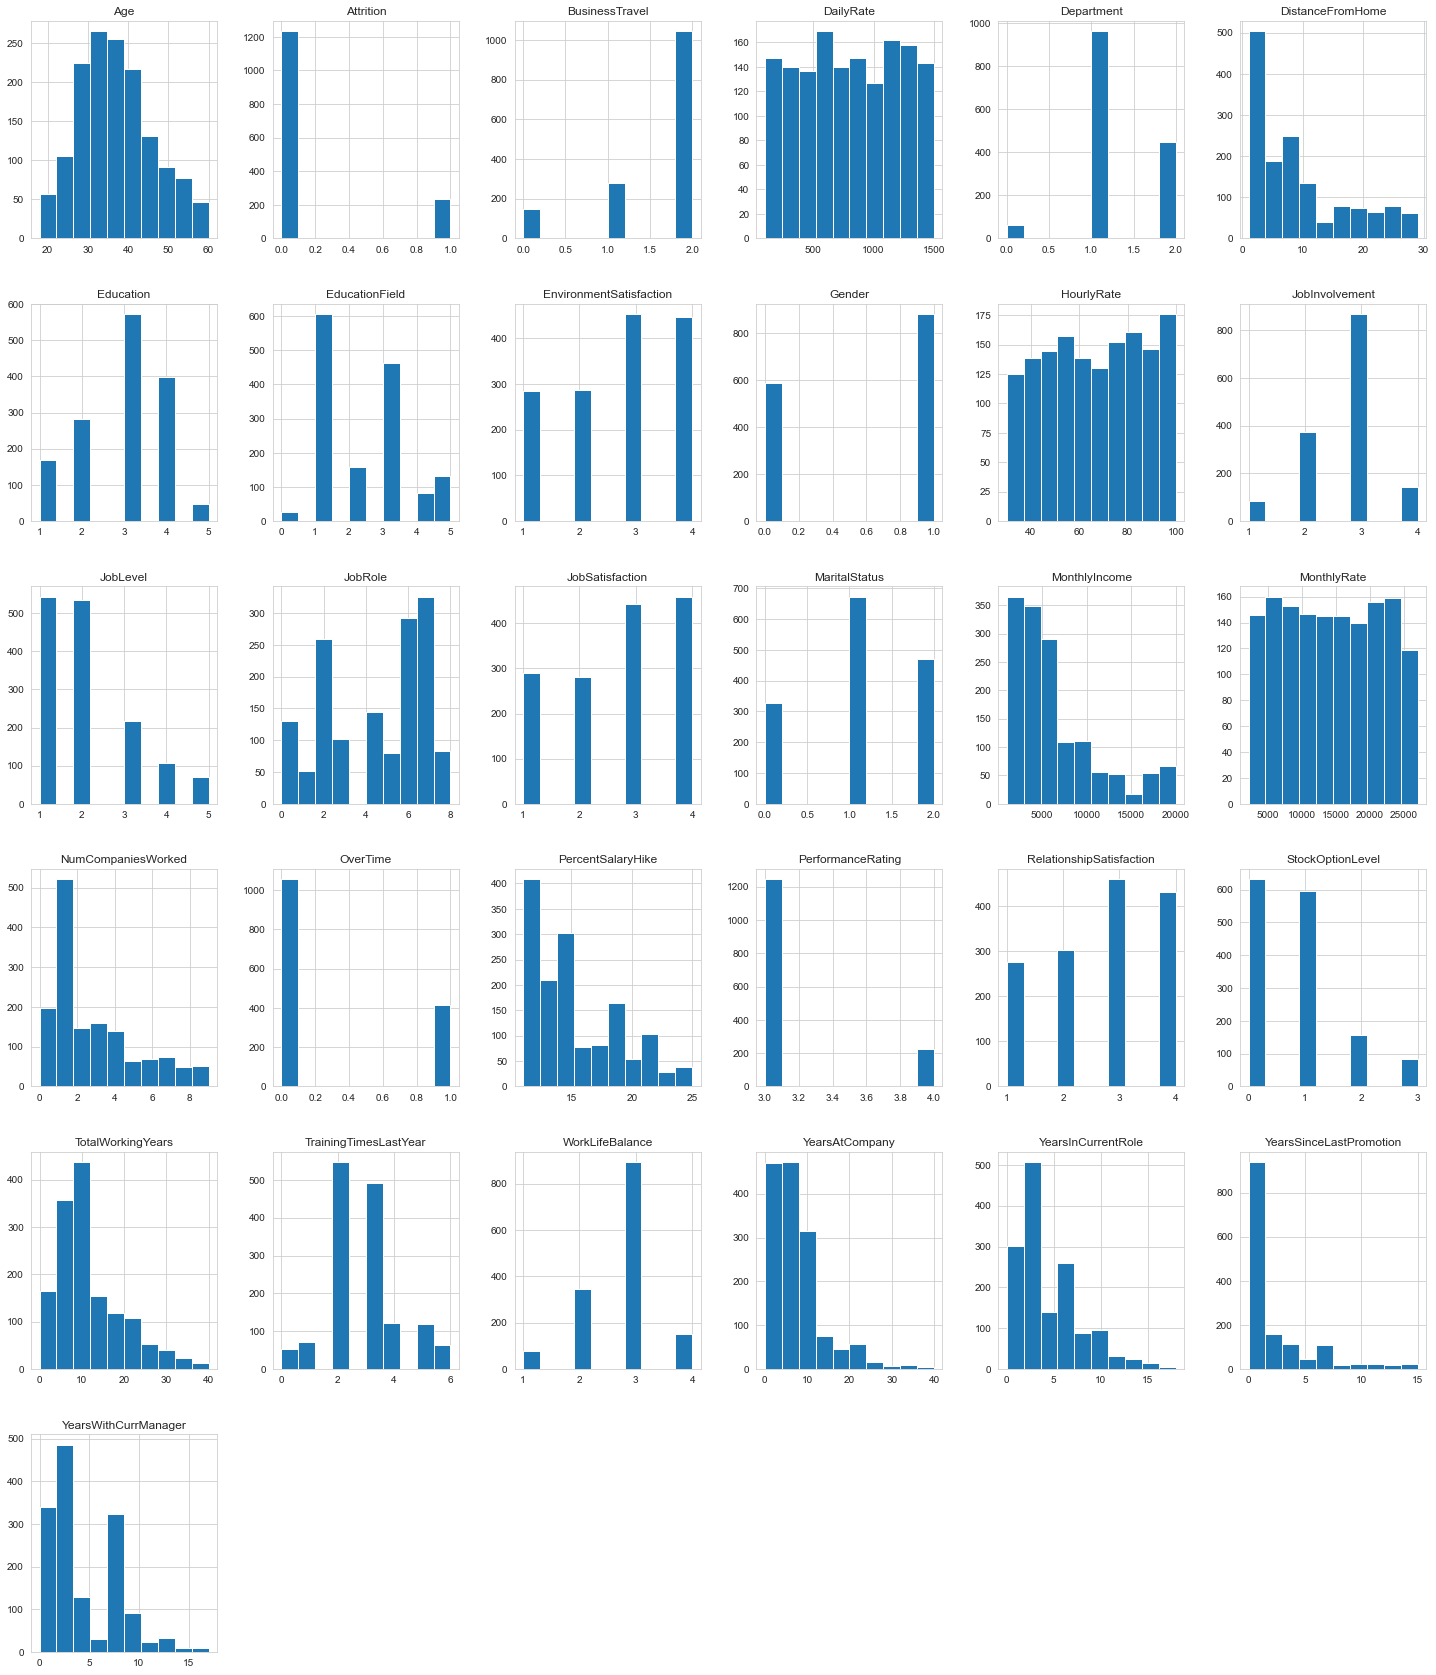

In [57]:
dfnew.hist(figsize=(25,30))
plt.show()

#validating using histogram plot that all the categorical columns convretd into int type.

# Checking Outliers by Zscore technique

In [58]:
dfnew.shape

(1470, 31)

In [59]:
z = np.abs(zscore(dfnew))
threshold = 3
dfnew1 = dfnew[(z<3).all(axis = 1)]

print ("Dataframe Shape before removing outliers: ", dfnew.shape)
print ("Dataframe Shape after removing outliers: ", dfnew1.shape)
print ("Percentage of data loss after outlier removal: ", (dfnew.shape[0]-dfnew1.shape[0])/dfnew.shape[0]*100)

dfnew=dfnew1.copy() # reassigning to our original dataframe name

Dataframe Shape before removing outliers:  (1470, 31)
Dataframe Shape after removing outliers:  (1387, 31)
Percentage of data loss after outlier removal:  5.646258503401361


Thus we see that the percentage loss is around 5% which is acceptable.

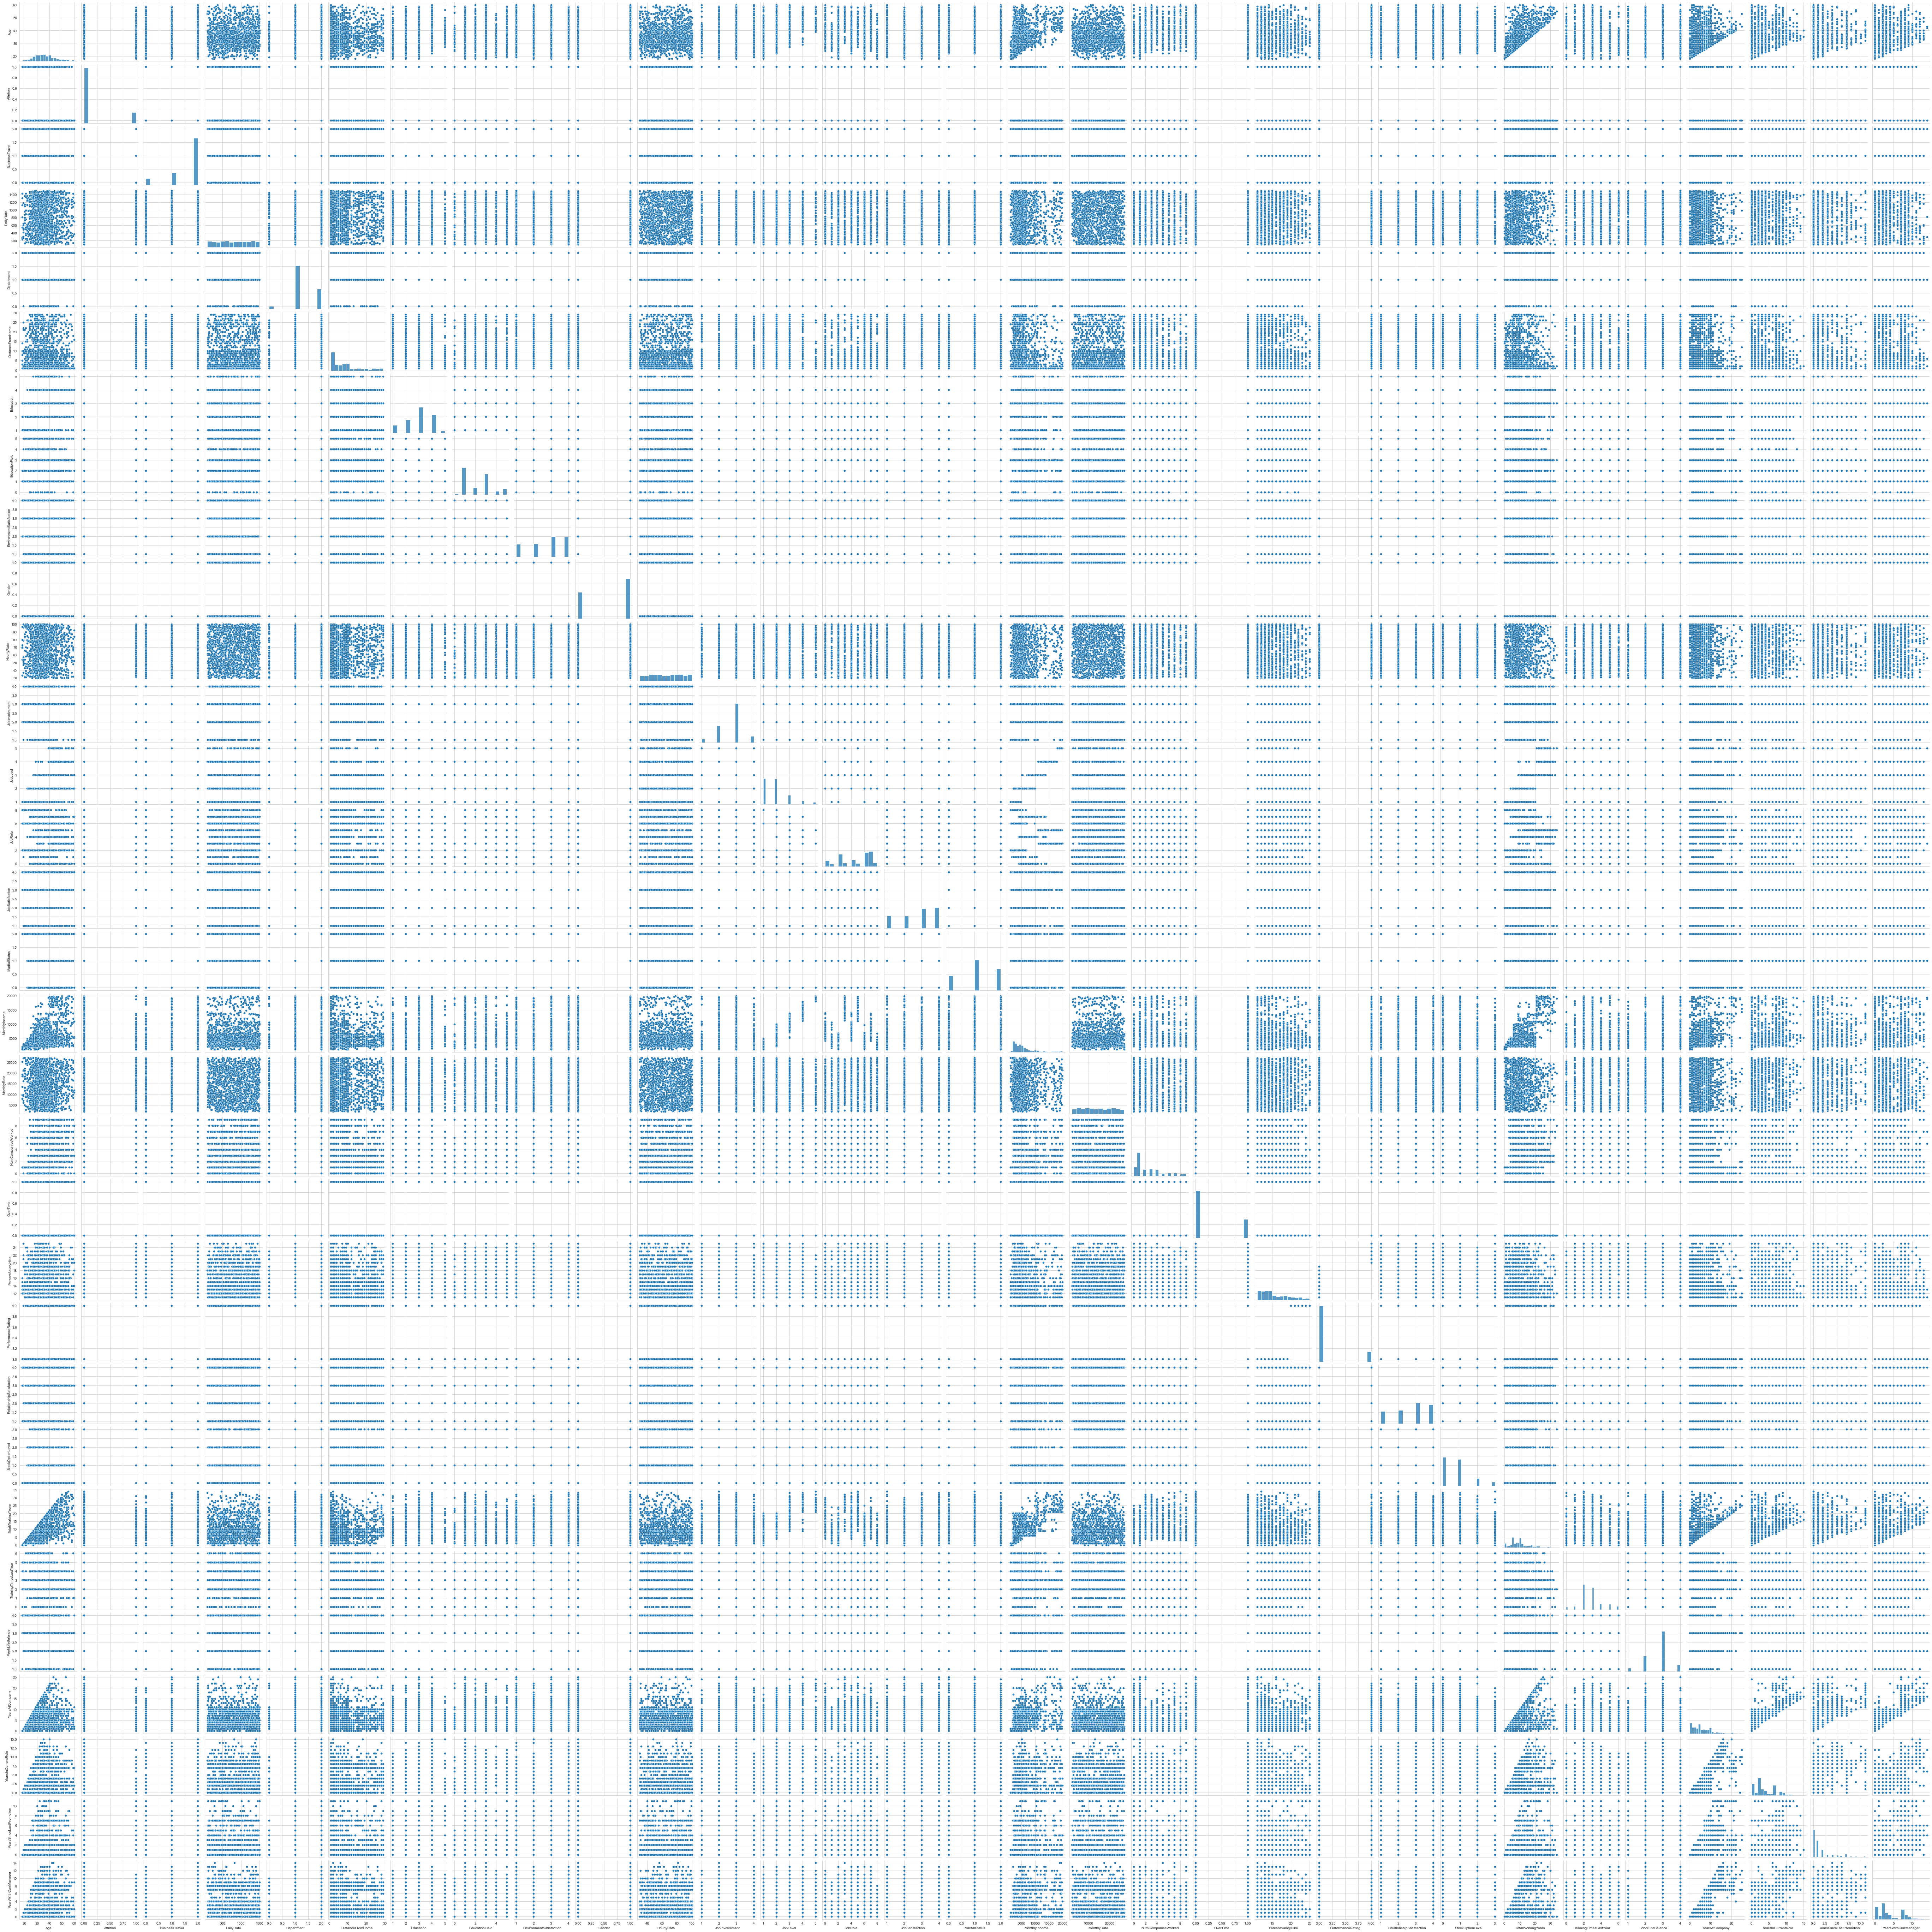

In [62]:
sns.pairplot(dfnew) #shows multiple pairwise bivariate distributions in a dataset and shows relationship bw them.

# Correlation using a Heatmap


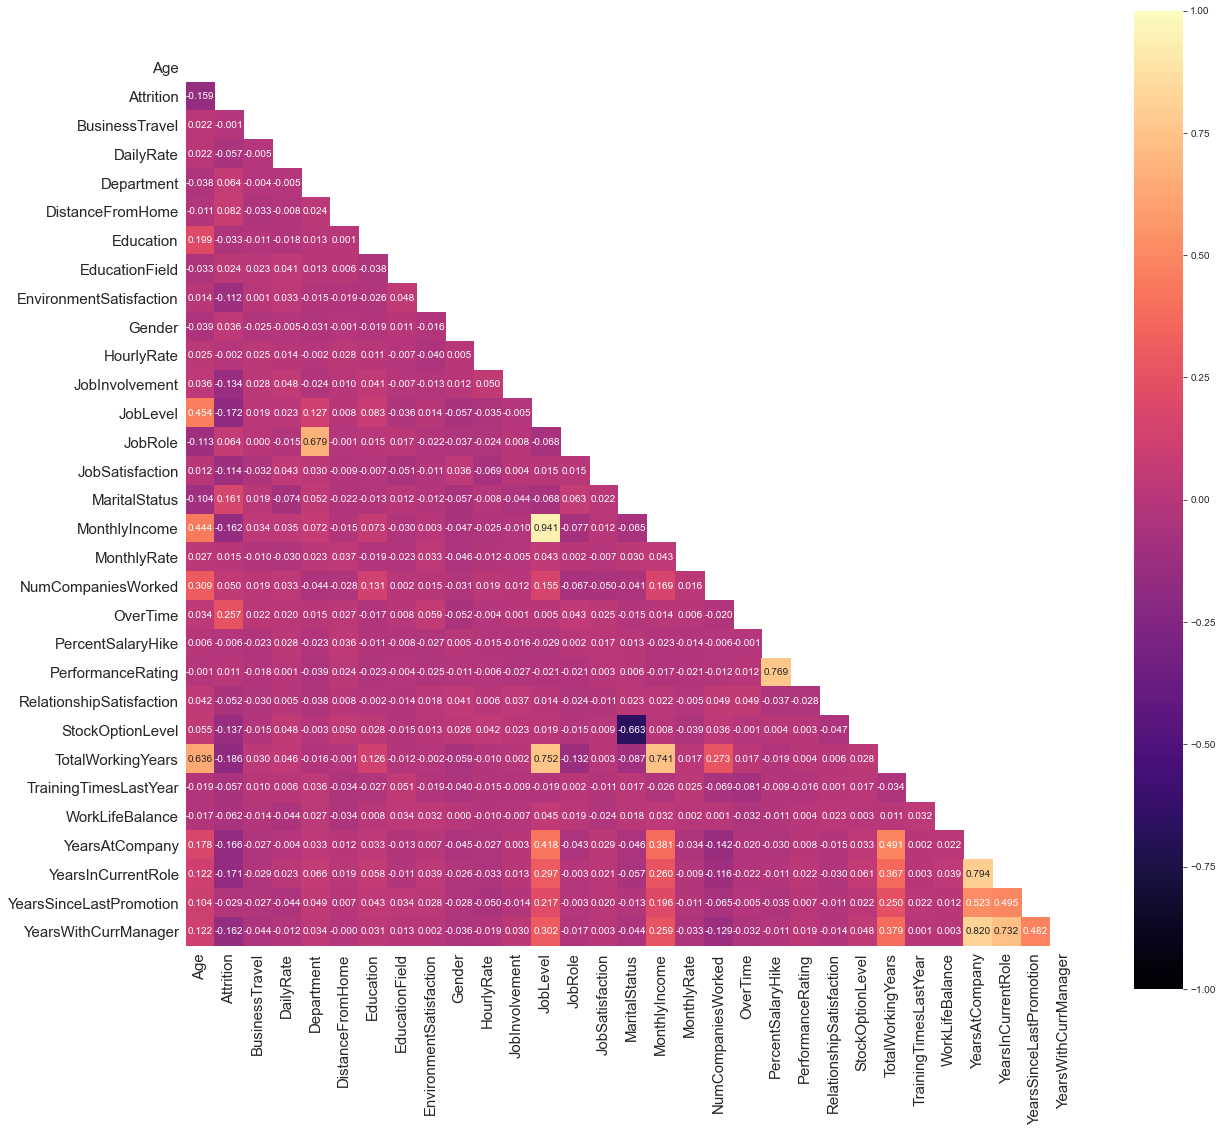

In [63]:
upper_triangle = np.triu(dfnew.corr())
plt.figure(figsize=(20,18))
sns.heatmap(dfnew.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="magma", mask=upper_triangle)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

we see that
1.jobrole and department are correlated at 67% so within each department,there are different job roles so ther are dependent on each other.

2.joblevel and total working year are correlated at 75% as employee going from low level to top level means they are working in that company for longer period of years.

3.monthlyincome and total working years are coorelated at 74% as monthlyincome incraese as the total working years increase.

4.total working years and age are correlated at 63%.

5.percentsalaryhike and performance rating are correlated at 76% as employee showing high performace gets more salary hike.

6.Yearsatcompany and yearswithcurrmanager are correlated at 82% as the if the curr manager is good and takes care of its sub-ordinates then employess will stay for a longer period of time.

8.Monthlyincome and joblevel are correlated at 94% as there are 5 job levels from top level to low level .
so those who are in top level thwy are getting high pays.

9.Maritalstatus and stockoptionlevel are negatively correlated.

So i dont think we need to drop any of the features as there is no significant multicollinearity exist. 

In [64]:
dfnew.shape


(1387, 31)

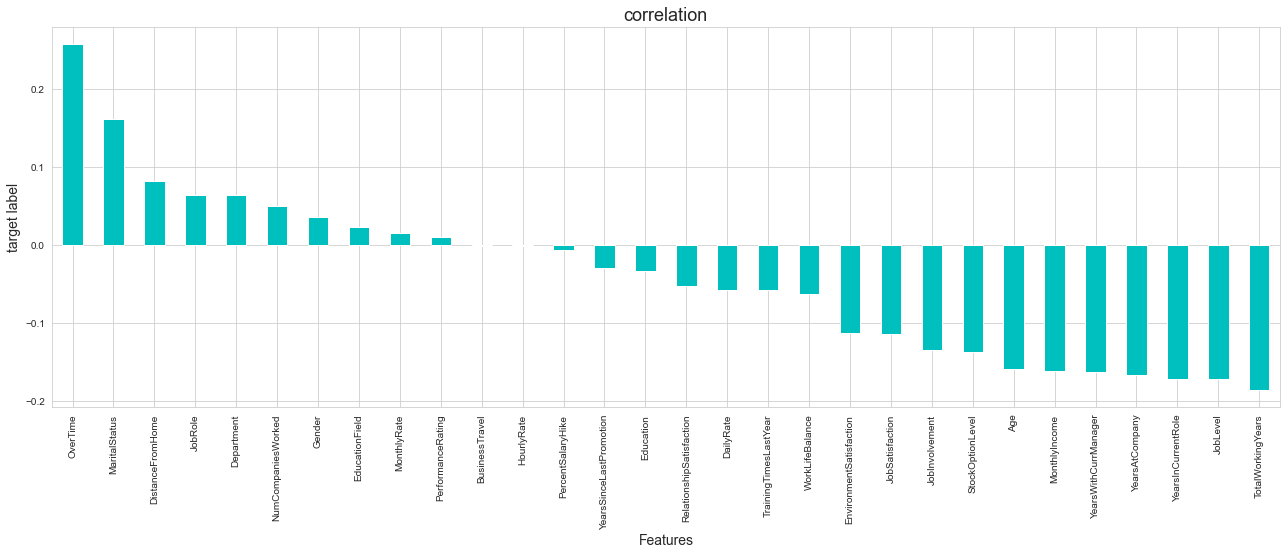

In [65]:
#bar plot showing correlation bw target and features
plt.figure(figsize=(22,7))
dfnew.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('target label',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


We see that most of the features are negatively correlated with attrition our target varibale and features which are positively correlated with attrition are Over_time,maritalstatus,distnacefromhome,jobrole,department,numcomapniesworked.


# Checking Skewness

In [66]:
dfnew.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

# Splitting into x and y before removing skewness

In [67]:
x=dfnew.drop('Attrition',axis=1)   #Independent variables
y=dfnew['Attrition']    #Dependent or Target Variable

In [68]:
#Checking x data
x.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0   41             2.0       1102         2.0                 1          2             1.0                        2     0.0          94               3         2      7.0                4            2.0           5993        19479                   8       1.0                 11                  3                         1                 0                  8                      0                1               6                   4                        0                     5
1   49             1.0        279         1.0                 8          1             1.0                        3     1.0          61               2         2      6.0                2            1.0           5130        24907                   1       0.0                 23                  4                         4                 1                 10                      3                3              10                   7                        1                     7
2   37             2.0       1373         1.0                 2          2             4.0                        4     1.0          92               2         1      2.0                3            2.0           2090         2396                   6       1.0                 15                  3                         2                 0                  7                      3                3               0                   0                        0                     0
3   33             1.0       1392         1.0                 3          4             1.0                        4     0.0          56               3         1      6.0                3            1.0           2909        23159                   1       1.0                 11                  3                         3                 0                  8                      3                3               8                   7                        3                     0
4   27             2.0        591         1.0                 2          1             3.0                        1     1.0          40               3         1      2.0                2            1.0           3468        16632                   9       0.0                 12                  3                         4                 1                  6                      3                3               2                   2                        2                     2

In [69]:
#Checking y data after splitting
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int32

In [70]:
#As most of the features are positively skewed,we can use sqare root and log transformation.
#So i m using Log transformation here
for col in x:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])
x.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome           -0.031570
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.497167
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.318873
MonthlyRate                 0.030596
NumCompaniesWorked          0.101288
OverTime                    0.954751
PercentSalaryHike           0.496106
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.275912
TotalWorkingYears          -0.728348
TrainingTimesLastYear      -1.044321
WorkLifeBalance            -0.557100
YearsAtCompany             -0.379527
Y

Thus we see most of the columns skewness have been removed. 

# Removing imbalance issue in label column using SMOTE

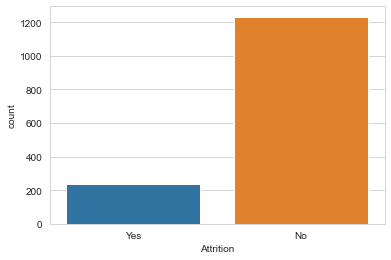

In [71]:
sns.countplot(x='Attrition', data=df)  #Plotting the attrition rate by numbers using countplot
plt.show()

we see that there is significant class imbalance in target colume Attrition

In [72]:
#  samples to make all the categorical quality values same
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [73]:
y.value_counts() #balanced data

0    1158
1    1158
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

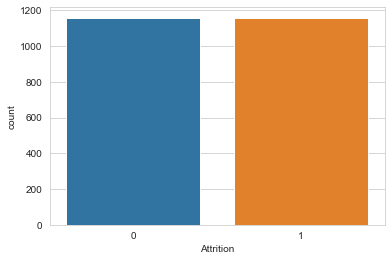

In [74]:
sns.countplot(y) #showing balanced data visiually

Thus we see that target column is balanced now

# Feature Scaling

In [75]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  EducationField  EnvironmentSatisfaction    Gender  HourlyRate  JobInvolvement  JobLevel   JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0  0.739851        0.702068   0.833355    1.380659         -1.678586  -0.737922       -1.005353                -0.421225 -1.382986    1.503234        0.639859  0.425805  0.985377         1.404171       1.148532       0.537828     0.710874            1.750615  1.348707          -1.358766          -0.460538                 -1.441178         -0.943185           0.171836              -3.400405        -2.195119        0.512078            0.569624                -0.983661              0.854614
1  1.672175       -0.964471  -1.283198   -0.597834          0.207146  -1.758847       -1.005353                 0.506993  0.832215   -0.248099       -0.709789  0.425805  0.559488        -0.465904      -0.302830       0.275583     1.484620           -0.658527 -0.861507           2.104131           2.531993                  1.423040          0.669559           0.462839               0.384371         0.530830        1.162424            1.200952                 0.016088              1.231856
2  0.273689        0.702068   1.530300   -0.597834         -1.170236  -0.737922        1.342464                 1.435211  0.832215    1.397092       -0.709789 -0.969395 -1.144069         0.469133       1.148532      -1.238689    -1.724260            1.348074  1.348707           0.078466          -0.460538                 -0.486439         -0.943185           0.001033               0.384371         0.530830       -2.287823           -1.592237                -0.983661             -1.494953
3 -0.192473       -0.964471   1.579163   -0.597834         -0.809555   1.303927       -1.005353                 1.435211 -1.382986   -0.513452        0.639859 -0.969395  0.559488         0.469133      -0.302830      -0.681146     1.235448           -0.658527  1.348707          -1.358766          -0.460538                  0.468300         -0.943185           0.171836               0.384371         0.530830        0.873686            1.200952                 1.015837             -1.494953
4 -0.891716        0.702068  -0.480811   -0.597834         -1.170236  -1.758847        0.559858                -1.349443  0.832215   -1.362583        0.639859 -0.969395 -1.144069        -0.465904      -0.302830      -0.384733     0.305042            1.919375 -0.861507          -0.958880          -0.460538                  1.423040          0.669559          -0.192608               0.384371         0.530830       -0.707069           -0.116537                 0.600903             -0.054323

# MODEL BUILDING

# Base model:Logistic Regression

In [76]:
lg = LogisticRegression()
from sklearn.model_selection import train_test_split

In [77]:
for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At Random State",i,"The model performs well")
        print("At Random state:",i)
        print(f"At random state,the training accuracy  is:-", accuracy_score(y_train,pred_train)*100)
        print(f"At random state,the testing accuracy is:-", accuracy_score(y_test,pred_test)*100)   
        print("\n")

At Random State 24 The model performs well
At Random state: 24
At random state,the training accuracy  is:- 85.79913606911447
At random state,the testing accuracy is:- 85.77586206896551


At Random State 47 The model performs well
At Random state: 47
At random state,the training accuracy  is:- 85.79913606911447
At random state,the testing accuracy is:- 85.77586206896551


At Random State 58 The model performs well
At Random state: 58
At random state,the training accuracy  is:- 85.96112311015118
At random state,the testing accuracy is:- 85.99137931034483


At Random State 129 The model performs well
At Random state: 129
At random state,the training accuracy  is:- 85.63714902807776
At random state,the testing accuracy is:- 85.5603448275862


At Random State 152 The model performs well
At Random state: 152
At random state,the training accuracy  is:- 85.58315334773218
At random state,the testing accuracy is:- 85.5603448275862




At Random State 24, The model performs well,the training accuracy  is:-85.79913606911447 
and the testing accuracy is:-85.77586206896551  which are almost close.we will take this our best random state.

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=24)

In [79]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

[[119 117]
 [113 115]]
              precision    recall  f1-score   support

           0       0.51      0.50      0.51       236
           1       0.50      0.50      0.50       228

    accuracy                           0.50       464
   macro avg       0.50      0.50      0.50       464
weighted avg       0.50      0.50      0.50       464



The accuracy of the model is 50%

# Cross validation score for logistic regression

In [80]:
pred_lg=lg.predict(x_test)
from sklearn.model_selection import cross_val_score
css=accuracy_score(y_test,pred_lg)

In [81]:
for j in range(2,15):
    css_score=cross_val_score(lg,x,y,cv=j)
    csc=css_score.mean()
    print("At cv:-",j)
    print("cross validation score is :-",csc*100)
    print("accuracy score is :-",css*100)
    print('\n')

At cv:- 2
cross validation score is :- 84.41278065630398
accuracy score is :- 85.77586206896551


At cv:- 3
cross validation score is :- 84.19689119170984
accuracy score is :- 85.77586206896551


At cv:- 4
cross validation score is :- 84.75820379965458
accuracy score is :- 85.77586206896551


At cv:- 5
cross validation score is :- 84.71847769419826
accuracy score is :- 85.77586206896551


At cv:- 6
cross validation score is :- 84.88773747841107
accuracy score is :- 85.77586206896551


At cv:- 7
cross validation score is :- 84.49994114646682
accuracy score is :- 85.77586206896551


At cv:- 8
cross validation score is :- 85.01953824125998
accuracy score is :- 85.77586206896551


At cv:- 9
cross validation score is :- 85.06486760038476
accuracy score is :- 85.77586206896551


At cv:- 10
cross validation score is :- 85.06120316465143
accuracy score is :- 85.77586206896551


At cv:- 11
cross validation score is :- 84.9760981514536
accuracy score is :- 85.77586206896551


At cv:- 12
cross va

 As the cross validation score and accuracy score are almost equal in all cases,so taking cv at :- 5,cross validation score is :- 84.71847769419826,accuracy score is :- 85.77586206896551.
 cross validation score and accuracy score not high gaps present that means we are in right approach

In [82]:
csc_selected=cross_val_score(lg,x,y,cv=5).mean()
print("The  cv score is :-",csc_selected *100,"\n The accuracy score is ",css*100)

The  cv score is :- 84.71847769419826 
 The accuracy score is  85.77586206896551


The final accuracy score of the model is 84.74% during cross validation as it might have treated overfitt problem 

# Modelling-Other models

In [83]:
#Modelling
#Model 1-Decision Tree

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

model1=DecisionTreeClassifier(random_state=24)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[210  26]
 [ 37 191]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       236
           1       0.88      0.84      0.86       228

    accuracy                           0.86       464
   macro avg       0.87      0.86      0.86       464
weighted avg       0.86      0.86      0.86       464



The accuracy score for DecisionTreeClassifier is 86% from classification report. 

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and 
what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:
    
True Positive(TP)=210,It states that 210 positive class data points were correctly classified by the model.

True Negative(TN)=191,It states that 191 negative class data points were correctly classified by the model.

False Positive(FP)=26,It states that 26 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=37 ,It states that 37 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it can disntinguisn relatively larger number of true positive and true negative values.


In [84]:
#Model 2-Random Forest

from sklearn.ensemble import RandomForestClassifier

model2=RandomForestClassifier(random_state=24)
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[229   7]
 [ 25 203]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       236
           1       0.97      0.89      0.93       228

    accuracy                           0.93       464
   macro avg       0.93      0.93      0.93       464
weighted avg       0.93      0.93      0.93       464



The accuracy score for Random Forest Classifier is 93% from classification report. 

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and 
what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=229,It states that 229 positive class data points were correctly classified by the model.

True Negative(TN)=203,It states that 203 negative class data points were correctly classified by the model.

False Positive(FP)=7,It states that 7 negative class data points were incorrectly classified as belonging to the positive class by the model

False Negative(FN)=25 ,It states that 25 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a very good classifier as from our dataset it can disntinguisn relatively larger number of true positive and true negative values and errors is less.


In [85]:
#Model 3-Ada Boost

from sklearn.ensemble import AdaBoostClassifier

model3=AdaBoostClassifier(random_state=24)
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[213  23]
 [ 15 213]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       236
           1       0.90      0.93      0.92       228

    accuracy                           0.92       464
   macro avg       0.92      0.92      0.92       464
weighted avg       0.92      0.92      0.92       464



The accuracy score for AdaBoostClassifier is 92% from classification report. 

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and 
what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=213,It states that 213 positive class data points were correctly classified by the model.

True Negative(TN)=213,It states that 213 negative class data points were correctly classified by the model.

False Positive(FP)=23,It states that 23 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=15 ,It states that 15 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it can disntinguisn relatively larger number of true positive and true negative values.


In [86]:
#Model 4-Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

model4=GradientBoostingClassifier(random_state=24)
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[226  10]
 [ 22 206]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       236
           1       0.95      0.90      0.93       228

    accuracy                           0.93       464
   macro avg       0.93      0.93      0.93       464
weighted avg       0.93      0.93      0.93       464



The accuracy score for GradientBoostingClassifier is 93% from classification report.

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=226,It states that 226 positive class data points were correctly classified by the model.

True Negative(TN)=206,It states that 206 negative class data points were correctly classified by the model.

False Positive(FP)=10,It states that 10 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=22 ,It states that 22 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it can disntinguisn relatively larger number of true positive and true negative values.

In [87]:
#Model 5-SVM
from sklearn.svm import SVC
model5=SVC(random_state=24)
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[212  24]
 [ 13 215]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       236
           1       0.90      0.94      0.92       228

    accuracy                           0.92       464
   macro avg       0.92      0.92      0.92       464
weighted avg       0.92      0.92      0.92       464



The accuracy score for SupportVectorClassifier is 92% from classification report.

Confusion matrix:It compares the actual target values with those predicted by the machine learning model and what kinds of errors it is making.Thus we see here in 2*2 matrix above,different values of the confusion matrix as explained below:

True Positive(TP)=212,It states that 212 positive class data points were correctly classified by the model.

True Negative(TN)=215,It states that 215 negative class data points were correctly classified by the model.

False Positive(FP)=24,It states that 24 negative class data points were incorrectly classified as belonging to the positive class by the model.

False Negative(FN)=13 ,It states that 13 positive class data points were incorrectly classified as belonging to the negative class by the model.

Thus we see that its a good classifier as from our dataset it can disntinguisn relatively larger number of true positive and true negative values.

Thus we see,as per the accuracy score as evaluation matrix,

The accuracy score of Decision tree classifier is 86% .

The accuracy score of Random Forest Classifier is 93%. 

The accuracy score of AdaBoost is 92%.

The accuracy score of Gradient Boosting is 93%.

The accuracy score of Support vector machine (SVM) is 92%.

The base model(logistic regression) accuracy score is 50%.,fter applying cv ,score improves to 84%.

Conclusion: We see that Random Forest Classifier,SVM Classifier,ADaBoost Gradient Boosting classifier are producing good accuracy.

Now we will check cross validation technque for overfitting for these selected models based on accuracy score as the evaluation matrix.

# CROSS VALIDATION For the models

Performing cross validation in all the models below:

In [88]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lg,x,y,cv=5)
print("The cross validation score of Logistic Regression model is :",scr.mean())

The cross validation score of Logistic Regression model is : 0.8471847769419826


In [89]:
scr=cross_val_score(model1,x,y,cv=5)
print("The cross validation score of Desicion Tree Classifier is :",scr.mean())

The cross validation score of Desicion Tree Classifier is : 0.8226279139048186


In [90]:
scr=cross_val_score(model2,x,y,cv=5)
print("The cross validation score of Random Forest Classifier is :",scr.mean())

The cross validation score of Random Forest Classifier is : 0.90858438221494


In [91]:
scr=cross_val_score(model3,x,y,cv=5)
print("The cross validation score of AdaBoost Classifier is :",scr.mean())

The cross validation score of AdaBoost Classifier is : 0.8718933864601176


In [92]:
scr=cross_val_score(model4,x,y,cv=5)
print("The cross validation score of GradientBoosting Classifier is :",scr.mean())

The cross validation score of GradientBoosting Classifier is : 0.8840005213376034


In [93]:
scr=cross_val_score(model5,x,y,cv=5)
print("The cross validation score of SVM Classifier is :",scr.mean())

The cross validation score of SVM Classifier is : 0.9093905935800999


Thus we see that after doing cross validation ,we can see the scores that Cross validation score of all the models have been reduced which means that cross validation is not decreasing the accuracy, it is rather giving us a better approximation for that accuracy, including less overfitting.So as per the avobe models:

Cross validation score :

Logistic Regression:84.7%

DEsicion Tree:82%

RandomForest:91%

AdaBoost:87%

GradientBoosting:88%

SVM:91%

So I am taking Random Forest rather than SVM for hyperparameter tuning under GridSearch as from the confusion matrix also we can see less error are detected by randomforest model compare to SVM.

# HYper parameter tuning

In [94]:
from sklearn.model_selection import GridSearchCV
#creating parameter list to pass in gridsearchcv
parameters= {'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [95]:
GCV = GridSearchCV(RandomForestClassifier(),parameters, cv= 5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_ #printing the best parameter found by gridsearch cv

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [96]:
GCV_pred=GCV.best_estimator_.predict(x_test) #predicting with best paramter
accuracy_score(y_test,GCV_pred) #checking final accuracy

0.9202586206896551

In [ ]:
Thus after cross validation and then doing hypertuning with best parametrs the accuracy score
has improved to 92% which is very good and this is our best fit model.

# AUC_ROC PLOT

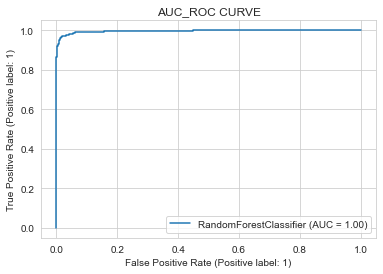

In [97]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x,y)
plt.title("AUC_ROC CURVE")
plt.show()

OBSERVATION: So final accuracy is 92 % and here we can see our AUC (c-value) is far greater than 0.5 ,it is 1 which can be considered very good which means   that the classifier is able to disntinguish between o and 1. So it can distinguish which
employees are going to leave and who are going to stay.We can defintly employ this model.    

# MODEL SAVING

In [98]:
#saving the Random forest Model with hypertuning best parameters
import pickle
filename='attritionfinal.pkl'
pickle.dump(GCV.best_estimator_,open(filename,'wb'))

# CONCLUSION:

In [100]:
loaded_model=pickle.load(open('attritionfinal.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100) #getting 92% score

92.02586206896551


In [101]:
#testing the predicted result with original dataset
import numpy as np 
a=np.array(y_test)
predicted=np.array(GCV.best_estimator_.predict(x_test))
df_com=pd.DataFrame({"original":a,"Predicted":predicted},index=range(len(a)))
df_com

original  Predicted
0           1          1
1           0          0
2           0          0
3           0          0
4           0          0
5           0          0
6           1          1
7           1          1
8           1          0
9           0          0
10          0          0
11          0          0
12          0          0
13          0          0
14          0          0
15          0          0
16          1          1
17          1          1
18          1          1
19          1          1
20          0          0
21          0          0
22          0          0
23          0          0
24          0          0
25          1          0
26          1          1
27          0          0
28          1          1
29          1          1
30          1          1
31          0          0
32          0          0
33          0          0
34          0          0
35          0          0
36          1          1
37          1          1
38          1          1
39          0          0
40          1          1
41          1          1
42          1          1
43          0          0
44          0          0
45          1          1
46          0          0
47          0          0
48          1          0
49          0          0
50          0          0
51          1          1
52          0          0
53          1          1
54          0          0
55          1          1
56          1          1
57          1          1
58          0          0
59          1          0
60          0          1
61          0          0
62          1          1
63          0          0
64          1          1
65          1          1
66          0          0
67          1          1
68          1          1
69          1          0
70          0          0
71          0          0
72          1          0
73          1          1
74          0          0
75          0          0
76          0          0
77          0          0
78          0          1
79          1          1
80          0          0
81          0          0
82          1          1
83          1          1
84          0          0
85          0          0
86          0          0
87          0          0
88          1          0
89          0          0
90          1          0
91          1          0
92          0          0
93          1          1
94          0          0
95          1          1
96          1          1
97          0          0
98          0          0
99          1          1
100         1          0
101         0          0
102         0          1
103         1          1
104         0          0
105         1          1
106         0          0
107         0          0
108         1          1
109         0          0
110         0          0
111         1          1
112         1          1
113         1          1
114         1          1
115         0          0
116         1          1
117         0          0
118         1          0
119         1          1
120         1          1
121         0          0
122         0          0
123         0          0
124         1          1
125         0          0
126         0          0
127         0          0
128         0          0
129         1          1
130         0          0
131         0          0
132         1          1
133         0          0
134         0          0
135         1          1
136         1          1
137         0          0
138         1          0
139         1          1
140         0          0
141         0          0
142         0          0
143         1          1
144         1          1
145         1          1
146         0          0
147         0          0
148         1          1
149         0          0
150         0          0
151         1          1
152         1          0
153         0          0
154         0          0
155         0          0
156         1          1
157         1          1
158         1          1
159  